In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, 

In [3]:
names=['sepal-length','sepal-width','petal-length','petal-width','class'];
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",names=names);#skilrows=1 beacause we want to skip header row


print(data[0:10]) #print first 10rows

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [4]:

data.describe()  #get statistics

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.shape #1: Return total number of rows and columns

(150, 5)

In [6]:
list(data.columns) #print columns

['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

In [7]:
data.dtypes #GEt data types of each column values

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
class            object
dtype: object

In [8]:
print(data['class'].describe()); #we can specify column name only also to fins statistical values

count                150
unique                 3
top       Iris-virginica
freq                  50
Name: class, dtype: object


In [9]:
#The class distribution
print("----------Class Distribution--------")
print(data.groupby('class').size())


----------Class Distribution--------
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [0]:
#data.groupby('petal-length').size() #Find count of each value

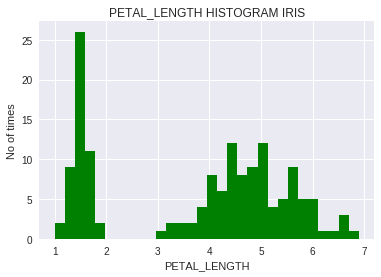

In [11]:
#histograms
#print("Displaying Histrogram")
plt.hist(data['petal-length'],bins=30,color=['green']) #bins represent no. of bars 
plt.ylabel('No of times')
plt.xlabel("PETAL_LENGTH");
plt.title("PETAL_LENGTH HISTOGRAM IRIS")
plt.show()

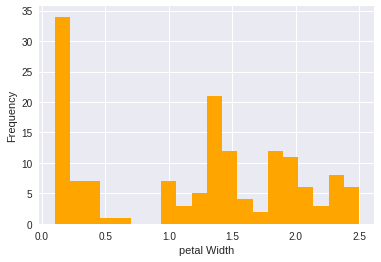

In [12]:
#histogram for  petal-width
plt.hist(data['petal-width'],bins=20,color=['orange'])
plt.xlabel("petal Width");
plt.ylabel('Frequency')
plt.show();

Displaying Box Plot


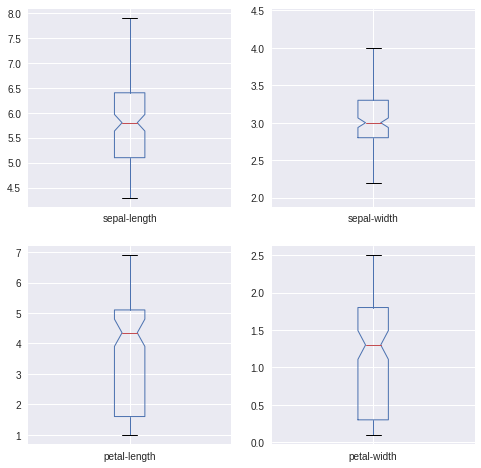

In [13]:
#box and whisker plot #Method 1
print("Displaying Box Plot");
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize = (8,8),notch=True)
plt.show()

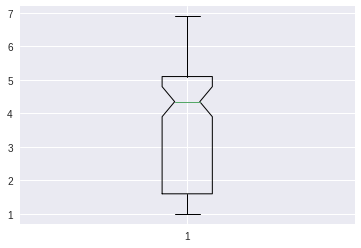

In [14]:
#boxplot method2
plt.boxplot(data['petal-length'],notch=True)
plt.show()

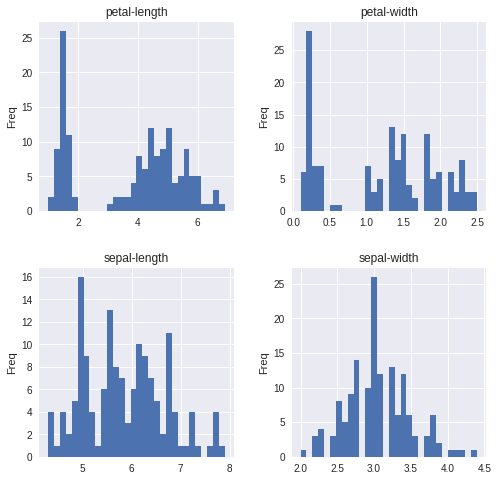

In [15]:
#histogram display method 2
histograph=data.hist(bins=30, figsize = (8,8)); #it internally calls matploylib.pyplot
for ax in histograph.flatten():
    ax.set_ylabel("Freq");
plt.show()

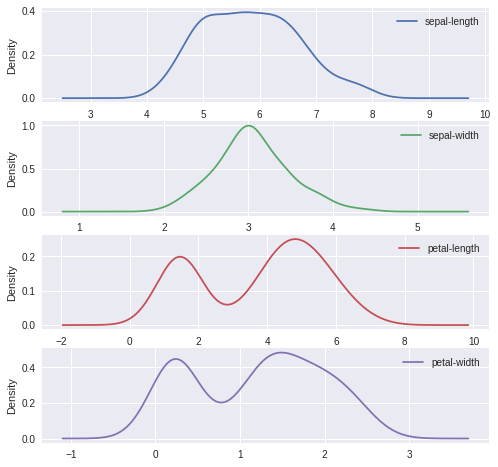

In [16]:
#Optional Display density Graph

data.plot(kind = "density", subplots = True, sharey = False,sharex=False, figsize = (8,8))
plt.show()

**EXTRA PART**

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [19]:
train_data,test_data=train_test_split(data,test_size=0.30, random_state=2)
train_data.shape, test_data.shape

((105, 5), (45, 5))

In [0]:
train_labels=train_data["class"].copy();
train_data=train_data.drop("class",axis=1);
test_labels=test_data["class"].copy();
test_data=test_data.drop("class",axis=1);

In [0]:
classifier=GaussianNB();
classifier.fit(train_data,train_labels);
predict=classifier.predict(test_data);

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [22]:
accuracy=accuracy_score(test_labels,predict)
accuracy

0.9777777777777777